##### Ouverture du fichier csv

In [142]:
import pandas as pd

In [143]:
data = pd.read_csv('les-arbres.csv', sep =';', error_bad_lines = False)

b'Skipping line 1916: expected 17 fields, saw 18\n'


###### Le fichier a du mal a  être ouvert. Les lignes contenant trop de champs provoquent par défaut une exception et notre dataset ne sera pas renvoyé. Tant que la valeur de "error_bad_lines " est False, ces «mauvaises lignes» seront supprimées du dataset.
###### La ligne 1916 a ete alors supprimée.

In [144]:
data.shape

(200332, 17)

######  Notre Dataset contient alors 200 332 observations et 17 variables (colonnes).


In [145]:
data.describe()
data.columns

Index(['IDBASE', 'TYPEEMPLACEMENT', 'DOMANIALITE', 'ARRONDISSEMENT',
       'COMPLEMENTADRESSE', 'NUMERO', 'LIEU / ADRESSE', 'IDEMPLACEMENT',
       'LIBELLEFRANCAIS', 'GENRE', 'ESPECE', 'VARIETEOUCULTIVAR',
       'CIRCONFERENCEENCM', 'HAUTEUR (m)', 'STADEDEVELOPPEMENT', 'REMARQUABLE',
       'geo_point_2d'],
      dtype='object')

###### Toujours dans la phase d'exploration de notre dataset, on utilise la fonction .desribe() qui génère des statistiques descriptives qui résument la tendance centrale, la dispersion et la forme de la distribution d'un jeu de données, à l'exclusion des valeurs NaN.


In [146]:
# enlever la colonne Numero
data.drop(columns = ['NUMERO'] , inplace = True)
data.columns

Index(['IDBASE', 'TYPEEMPLACEMENT', 'DOMANIALITE', 'ARRONDISSEMENT',
       'COMPLEMENTADRESSE', 'LIEU / ADRESSE', 'IDEMPLACEMENT',
       'LIBELLEFRANCAIS', 'GENRE', 'ESPECE', 'VARIETEOUCULTIVAR',
       'CIRCONFERENCEENCM', 'HAUTEUR (m)', 'STADEDEVELOPPEMENT', 'REMARQUABLE',
       'geo_point_2d'],
      dtype='object')

In [147]:
data['HM']= data['HAUTEUR (m)']
data['HM'].value_counts()
data.columns

Index(['IDBASE', 'TYPEEMPLACEMENT', 'DOMANIALITE', 'ARRONDISSEMENT',
       'COMPLEMENTADRESSE', 'LIEU / ADRESSE', 'IDEMPLACEMENT',
       'LIBELLEFRANCAIS', 'GENRE', 'ESPECE', 'VARIETEOUCULTIVAR',
       'CIRCONFERENCEENCM', 'HAUTEUR (m)', 'STADEDEVELOPPEMENT', 'REMARQUABLE',
       'geo_point_2d', 'HM'],
      dtype='object')

###### La fonction.value_counts() retourne dans cet exemple le type d'especes d'arbres contenant des nombres de valeurs uniques.
###### Cet objet résultant est dans l'ordre décroissant pour que la premiere espece d'arbres soit l'élément le plus fréquent.

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline

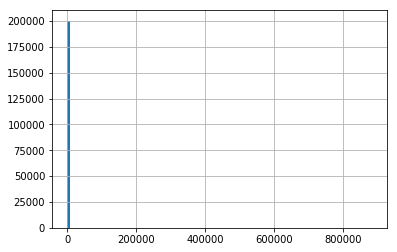

In [149]:
data['HM'].hist(bins = 100)
#plt.boxplot(data['HM'])

##### Cet histogramme nous a permis de trouver les outliers (les valeurs aberrantes), les arbres a tres haute hauteur et de les retirer du dataset de la maniere qui suit :

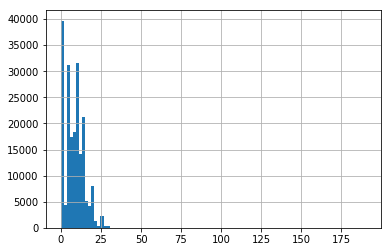

In [150]:
data_1= data[data.HM < 200]
data_1['HM'].hist(bins = 100)
data = data_1

In [151]:
# calcule de la variable diametre
import numpy as np
data['diametre']= data['CIRCONFERENCEENCM'] .apply(lambda c : c /np.pi )
data.diametre.describe()

count    200286.000000
mean         26.525803
std         214.137889
min           0.000000
25%           9.549297
50%          22.281692
75%          36.605637
max       79658.640567
Name: diametre, dtype: float64

In [152]:
np.percentile(data.diametre, 99.9)

135.5092931967406

##### Nous continuerons cette exploration pour le reste des variables  ,pour ainsi eleminer toutes les valeurs aberrantes.

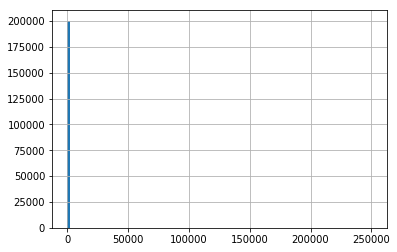

In [153]:
data['CIRCONFERENCEENCM'].value_counts()
data['CIRCONFERENCEENCM'].hist(bins = 100)

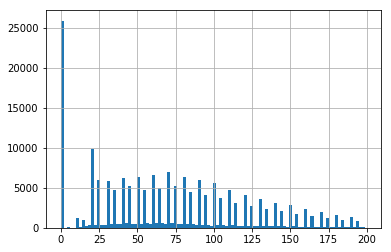

In [154]:
data_1= data[data.CIRCONFERENCEENCM < 200]
data_1['CIRCONFERENCEENCM'].hist(bins = 100)

In [155]:
data = data_1

In [156]:
import matplotlib.pyplot as plt
import numpy as np 

C:\Users\khalid\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\khalid\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1246: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\khalid\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1253: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\khalid\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1261: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\khalid\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1262: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


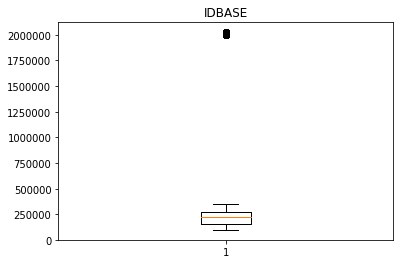

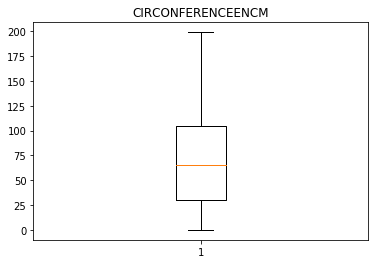

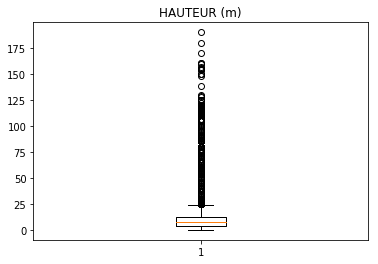

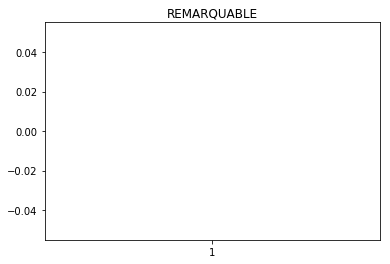

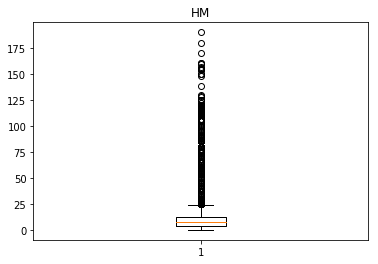

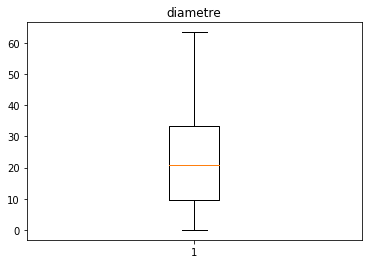

In [157]:
for i in range(len(data.iloc[1,:])):
    if data.iloc[:,i].dtype ==  'float64':
        figure = plt.figure()
        plt.boxplot(data.iloc[:,i])
        plt.title('%s' %data.columns[i])

##### On peut aussi etudier la variable ESPECE.

In [158]:
data['ESPECE'].value_counts()

x hispanica                     32865
hippocastanum                   17647
japonica                        11624
n. sp.                           8820
tomentosa                        8744
pseudoplatanus                   7076
platanoides                      6214
x europaea                       4686
nigra                            4620
x carnea                         4362
australis                        4112
cordata                          3831
excelsior                        3747
betulus                          3456
colurna                          3358
occidentalis                     3229
calleryana                       3124
platyphyllos                     2887
serrulata                        2389
pseudoacacia                     2223
orientalis                       1983
baccata                          1945
sylvatica                        1870
campestre                        1523
pendula                          1456
alba                             1196
nigra subsp.

##### Plusieurs especes ne comptent qu'un seul arbre.On peut les considerer alors tels des outliers qui doivent etre eliminer de notre dataset.

In [159]:
df = data['ESPECE'].value_counts()
df[df>400]
mesarbres= df[df>400].keys()
mesarbres
condition1=data['ESPECE'].isin(mesarbres)
ndata=data[condition1]
ndata['ESPECE'].value_counts()

x hispanica               32865
hippocastanum             17647
japonica                  11624
n. sp.                     8820
tomentosa                  8744
pseudoplatanus             7076
platanoides                6214
x europaea                 4686
nigra                      4620
x carnea                   4362
australis                  4112
cordata                    3831
excelsior                  3747
betulus                    3456
colurna                    3358
occidentalis               3229
calleryana                 3124
platyphyllos               2887
serrulata                  2389
pseudoacacia               2223
orientalis                 1983
baccata                    1945
sylvatica                  1870
campestre                  1523
pendula                    1456
alba                       1196
nigra subsp. nigra         1193
robur                      1143
tulipifera                 1120
sinensis                   1081
siliquastrum                998
negundo 

In [160]:
data = ndata

In [161]:
data.shape

(172754, 18)

###### Le nombre d'observation est alors passe de 200332 a 172754. Passons maintenant a l'etude du nombre d'arbres  par  arrondissement, par espèces et par *domanialité*. 
1. Par arrondissement:

PARIS 15E ARRDT      15090
PARIS 13E ARRDT      14524
PARIS 16E ARRDT      13897
PARIS 20E ARRDT      12728
PARIS 19E ARRDT      11668
PARIS 12E ARRDT      11023
SEINE-SAINT-DENIS     9921
PARIS 14E ARRDT       9742
BOIS DE VINCENNES     9651
PARIS 17E ARRDT       8779
PARIS 18E ARRDT       8637
PARIS 7E ARRDT        7992
PARIS 8E ARRDT        6419
VAL-DE-MARNE          6170
PARIS 11E ARRDT       5175
HAUTS-DE-SEINE        5091
BOIS DE BOULOGNE      3697
PARIS 10E ARRDT       2653
PARIS 4E ARRDT        2403
PARIS 5E ARRDT        2046
PARIS 6E ARRDT        1618
PARIS 1ER ARRDT       1257
PARIS 3E ARRDT        1106
PARIS 9E ARRDT        1052
PARIS 2E ARRDT         415
Name: ARRONDISSEMENT, dtype: int64


<BarContainer object of 25 artists>

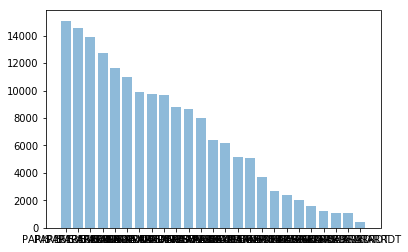

In [162]:
cond = data['ARRONDISSEMENT'].value_counts()
print(cond)
plt.bar( cond.keys(),cond, align='center', alpha=0.5)


x hispanica               32865
hippocastanum             17647
japonica                  11624
n. sp.                     8820
tomentosa                  8744
pseudoplatanus             7076
platanoides                6214
x europaea                 4686
nigra                      4620
x carnea                   4362
australis                  4112
cordata                    3831
excelsior                  3747
betulus                    3456
colurna                    3358
occidentalis               3229
calleryana                 3124
platyphyllos               2887
serrulata                  2389
pseudoacacia               2223
orientalis                 1983
baccata                    1945
sylvatica                  1870
campestre                  1523
pendula                    1456
alba                       1196
nigra subsp. nigra         1193
robur                      1143
tulipifera                 1120
sinensis                   1081
siliquastrum                998
negundo 

<BarContainer object of 56 artists>

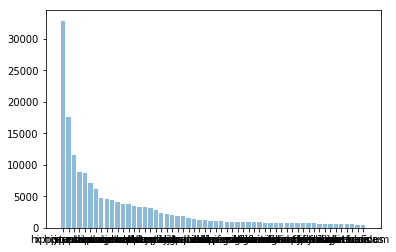

In [163]:
cond1 = data['ESPECE'].value_counts()
print(cond1)
plt.bar( cond1.keys(),cond1, align='center', alpha=0.5)


Alignement      96442
Jardin          34592
CIMETIERE       27058
DASCO            5518
PERIPHERIQUE     4723
DJS              3299
DFPE             1103
DAC                15
DASES               4
Name: DOMANIALITE, dtype: int64


<BarContainer object of 9 artists>

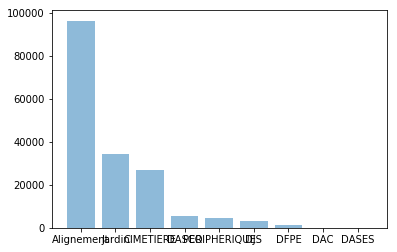

In [164]:
cond2 = data['DOMANIALITE'].value_counts()
print(cond2)
plt.bar( cond2.keys(),cond2, align='center', alpha=0.5)


La partie des arbres remarquables :
Nous allons tout d'abord creer un dataset contenant les arbres taggés comme étant remarquables puis tirer les caracteristiques de ces arbres, leur espèce et leur taille.

In [165]:
data['REMARQUABLE'].value_counts()

0.0    119008
1.0        20
Name: REMARQUABLE, dtype: int64

In [166]:
df = data.loc[data['REMARQUABLE'] == 1]
df

,IDBASE,TYPEEMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENTADRESSE,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLEFRANCAIS,GENRE,ESPECE,VARIETEOUCULTIVAR,CIRCONFERENCEENCM,HAUTEUR (m),STADEDEVELOPPEMENT,REMARQUABLE,geo_point_2d,HM,diametre
6719,121940.0,Arbre,Jardin,PARIS 20E ARRDT,20-06,SQUARE EDOUARD VAILLANT,00000045,Noisetier de Byzance,Corylus,colurna,NaN,160.0,16.0,M,1.0,"48.8658628897, 2.40006789337",16.0,50.929582
10815,128373.0,Arbre,Jardin,PARIS 15E ARRDT,NaN,SQUARE DU CLOS FEUQUIERES,00000002,Hêtre,Fagus,sylvatica,'Pendula',125.0,5.0,A,1.0,"48.8363411221, 2.29020948574",5.0,39.788736
24225,123848.0,Arbre,Jardin,PARIS 4E ARRDT,NaN,SQUARE DE LA TOUR SAINT JACQUES / 1 BIS RUE SA...,000103001,Mûrier,Morus,alba,NaN,96.0,6.0,A,1.0,"48.8578670722, 2.34811930339",6.0,30.557749
47339,136305.0,Arbre,Jardin,PARIS 16E ARRDT,NaN,JARDIN DES SERRES D AUTEUIL / 1 AVENUE GORDON ...,00040021,Magnolia,Magnolia,grandiflora,NaN,178.0,10.0,M,1.0,"48.8472736385, 2.25198968756",10.0,56.659160
63085,2002359.0,Arbre,Jardin,PARIS 12E ARRDT,NaN,ILE DE BERCY / LAC DAUMESNIL,12-13,Cryptomeria,Cryptomeria,japonica,NaN,122.0,18.0,A,1.0,"48.8311975549, 2.41168725636",18.0,38.833806
71256,103916.0,Arbre,Jardin,PARIS 19E ARRDT,NaN,PARC DES BUTTES CHAUMONT,O1020001,If,Taxus,baccata,NaN,140.0,13.0,M,1.0,"48.8770427283, 2.38050012851",13.0,44.563384
80034,109016.0,Arbre,Jardin,PARIS 7E ARRDT,07-10,SQUARE D'AJACCIO,00000034,Magnolia,Magnolia,grandiflora,NaN,153.0,13.0,M,1.0,"48.8574173085, 2.31472511735",13.0,48.701413
102690,125051.0,Arbre,Jardin,PARIS 4E ARRDT,NaN,SQUARE JEAN XXIII / 2 QUAI DE L ARCHEVECHE,00000059,Tamaris,Tamarix,n. sp.,NaN,81.0,4.0,M,1.0,"48.852346005, 2.35182356011",4.0,25.783101
102740,110444.0,Arbre,Jardin,PARIS 14E ARRDT,14-11,PARC MONTSOURIS,000A0007,Hêtre,Fagus,sylvatica,'Tortuosa',135.0,5.0,M,1.0,"48.8233452352, 2.33968342685",5.0,42.971835
110275,158456.0,Arbre,CIMETIERE,PARIS 20E ARRDT,20-13,CIMETIERE DU PERE LACHAISE / DIV 78,D00000078004,Arbre aux quarante écus,Ginkgo,biloba,NaN,175.0,15.0,A,1.0,"48.863856986, 2.39663716021",15.0,55.704230


In [167]:
df.describe()

,IDBASE,CIRCONFERENCEENCM,HAUTEUR (m),REMARQUABLE,HM,diametre
count,2.000000e+01,20.000000,20.000000,20.0,20.000000,20.000000
mean,3.138362e+05,135.600000,10.100000,1.0,10.100000,43.162821
std,5.776479e+05,38.826741,5.919637,0.0,5.919637,12.358935
min,1.039160e+05,55.000000,3.000000,1.0,3.000000,17.507044
25%,1.148230e+05,106.250000,5.000000,1.0,5.000000,33.820425
50%,1.275170e+05,139.000000,8.000000,1.0,8.000000,44.245074
75%,1.363090e+05,161.250000,13.500000,1.0,13.500000,51.327469
max,2.002362e+06,196.000000,23.000000,1.0,23.000000,62.388738


In [168]:
df1 = data.loc[data['REMARQUABLE'] == 0]
df1.describe()

,IDBASE,CIRCONFERENCEENCM,HAUTEUR (m),REMARQUABLE,HM,diametre
count,1.190080e+05,119008.000000,119008.000000,119008.0,119008.000000,119008.000000
mean,4.646303e+05,81.820214,9.743017,0.0,9.743017,26.044183
std,6.054864e+05,47.985671,6.830358,0.0,6.830358,15.274313
min,9.987400e+04,0.000000,0.000000,0.0,0.000000,0.000000
25%,2.089968e+05,45.000000,5.000000,0.0,5.000000,14.323945
50%,2.487825e+05,78.000000,10.000000,0.0,10.000000,24.828171
75%,2.848515e+05,115.000000,13.000000,0.0,13.000000,36.605637
max,2.024744e+06,199.000000,190.000000,0.0,190.000000,63.343667


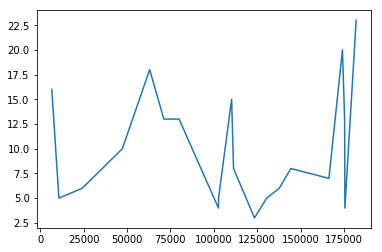

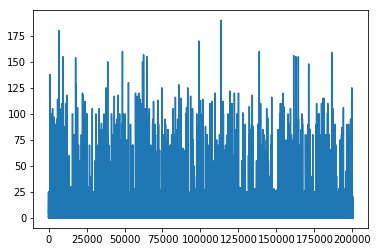

In [169]:
figure = plt.figure()
plt.plot(df['HM'])
figure = plt.figure()
plt.plot(data['HM'])

On remarque que la hauteur moyenne ainsi que la circonference moyenne des arbres remarquables sont bien plus elevees que les non remarquables. Quant a la valeur minimale de la circonference, cette derniere atteint  125cm pour les remarquables et 0 pour les non remarquables....


Méthodes pour traiter les données manquantes de cette colonne *remarquable* : 
1. Suppression des observations( la technique la plus simple et courante) . Elle consiste à supprimer les observations (les lignes) qui contiennent la donnee manquante... C'est la methode qu'on va adopter.
2. Imputation de données en remplacant les valeurs manquantes dans la colonne par des valeurs artificielles.

In [170]:
condition = data['REMARQUABLE'] != 0
data[condition]

,IDBASE,TYPEEMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENTADRESSE,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLEFRANCAIS,GENRE,ESPECE,VARIETEOUCULTIVAR,CIRCONFERENCEENCM,HAUTEUR (m),STADEDEVELOPPEMENT,REMARQUABLE,geo_point_2d,HM,diametre
1,235862.0,Arbre,Alignement,PARIS 18E ARRDT,NaN,AVENUE DE LA PORTE DE CLIGNANCOURT,000303007,Tilleul,Tilia,tomentosa,NaN,60.0,10.0,JA,NaN,"48.8999949231, 2.34379810146",10.0,19.098593
2,236391.0,Arbre,Alignement,PARIS 15E ARRDT,27,BOULEVARD GARIBALDI,000101024,Noisetier de Byzance,Corylus,colurna,NaN,60.0,10.0,JA,NaN,"48.8470727044, 2.30470921442",10.0,19.098593
4,99927.0,Arbre,Jardin,PARIS 16E ARRDT,NaN,JARDIN DU RANELAGH,00030007,Erable,Acer,platanoides,'Schwedleri',125.0,0.0,NaN,NaN,"48.858836461, 2.26870442691",0.0,39.788736
5,108989.0,Arbre,Jardin,PARIS 7E ARRDT,NaN,SQUARE D'AJACCIO,00000007,Marronnier,Aesculus,x carnea,NaN,120.0,8.0,NaN,NaN,"48.8572311438, 2.31436900012",8.0,38.197186
6,113077.0,Arbre,Jardin,PARIS 19E ARRDT,NaN,PARC DES BUTTES CHAUMONT,K69K0022,Faux-cyprès,Chamaecyparis,lawsoniana,NaN,100.0,0.0,NaN,NaN,"48.8800461318, 2.37986061234",0.0,31.830989
9,129852.0,Arbre,Jardin,PARIS 15E ARRDT,NaN,PARC ANDRE CITROEN,00050592,Hêtre,Fagus,sylvatica,NaN,0.0,0.0,NaN,NaN,"48.8411804912, 2.27584658848",0.0,0.000000
11,139159.0,Arbre,Jardin,PARIS 18E ARRDT,NaN,JARDIN NATUREL ET SAUVAGE SAINT-VINCENT,00000006,If,Taxus,baccata,NaN,25.0,4.0,NaN,NaN,"48.8881282511, 2.34102572921",4.0,7.957747
12,141731.0,Arbre,CIMETIERE,VAL-DE-MARNE,NaN,CIMETIERE DE THIAIS / AVENUE O / DIV 90,A13800090005,Erable,Acer,platanoides,NaN,0.0,0.0,NaN,NaN,"48.7597031103, 2.38136750751",0.0,0.000000
13,144827.0,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,CIMETIERE DE PANTIN / AVENUE DU FORT / DIV 52,A09600052010,Erable,Acer,pseudoplatanus,NaN,0.0,0.0,NaN,NaN,"48.9065215758, 2.4095130244",0.0,0.000000
15,165650.0,Arbre,CIMETIERE,SEINE-SAINT-DENIS,NaN,CIMETIERE DE PANTIN / AVENUE DES MURIERS BLANC...,A06900051010,Poirier à fleurs,Pyrus,calleryana,'Bradford',0.0,0.0,NaN,NaN,"48.9071260108, 2.4112767272",0.0,0.000000


## DataSet Arrondissement

In [171]:
dataset = pd.read_csv('arrondissements.csv', error_bad_lines = False , sep= ',')

In [172]:
dataset.head()

,ARROND,SUPERFICIE
0,BOIS DE BOULOGNE,8.46
1,BOIS DE VINCENNES,9.95
2,SEINE-SAINT-DENIS,236.00
3,VAL-DE-MARNE,245.00
4,HAUTS-DE-SEINE,176.00


In [173]:
dataset['Paris'] = None
for i in range (len(dataset)):
    p = dataset.iloc[i,0]
    if p[0:5] != "PARIS":
        dataset.iloc[i,2] = False
    elif p[0:5] == "PARIS" :
        dataset.iloc[i,2] = True
        
    

In [174]:
condition = dataset['Paris'] == True
arrondparis = dataset[condition]
arrondparis

,ARROND,SUPERFICIE,Paris
5,PARIS 1ER ARRDT,1.826,True
6,PARIS 2E ARRDT,0.992,True
7,PARIS 3E ARRDT,1.171,True
8,PARIS 4E ARRDT,1.601,True
9,PARIS 5E ARRDT,2.541,True
10,PARIS 6E ARRDT,2.154,True
11,PARIS 7E ARRDT,4.088,True
12,PARIS 8E ARRDT,3.881,True
13,PARIS 9E ARRDT,2.179,True
14,PARIS 10E ARRDT,2.892,True


##  Le nombre d'arbres dans les arrondissements contenant Paris

In [175]:
condition = data.ARRONDISSEMENT.str.contains('PARIS')
data[condition].ARRONDISSEMENT.value_counts()
data = data[condition]
data.ARRONDISSEMENT.value_counts()

PARIS 15E ARRDT    15090
PARIS 13E ARRDT    14524
PARIS 16E ARRDT    13897
PARIS 20E ARRDT    12728
PARIS 19E ARRDT    11668
PARIS 12E ARRDT    11023
PARIS 14E ARRDT     9742
PARIS 17E ARRDT     8779
PARIS 18E ARRDT     8637
PARIS 7E ARRDT      7992
PARIS 8E ARRDT      6419
PARIS 11E ARRDT     5175
PARIS 10E ARRDT     2653
PARIS 4E ARRDT      2403
PARIS 5E ARRDT      2046
PARIS 6E ARRDT      1618
PARIS 1ER ARRDT     1257
PARIS 3E ARRDT      1106
PARIS 9E ARRDT      1052
PARIS 2E ARRDT       415
Name: ARRONDISSEMENT, dtype: int64

In [176]:
def format_arrdt(texte):
    texte = '751' + texte.split(' ')[1].replace('E','').replace('R','').zfill(2) 
    return int(texte)

In [177]:
#On ajoute une colonne qui contient le code postal derivé de numero d'arrondissement.
data['code_postal']  = data['ARRONDISSEMENT'].apply(lambda ardt : format_arrdt(ardt) )
data.head(3)

C:\Users\khalid\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,IDBASE,TYPEEMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENTADRESSE,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLEFRANCAIS,GENRE,ESPECE,VARIETEOUCULTIVAR,CIRCONFERENCEENCM,HAUTEUR (m),STADEDEVELOPPEMENT,REMARQUABLE,geo_point_2d,HM,diametre,code_postal
0,232702.0,Arbre,Alignement,PARIS 11E ARRDT,NaN,BOULEVARD DE MENILMONTANT,000602002,Sophora,Sophora,japonica,NaN,55.0,5.0,JA,0.0,"48.8652353853, 2.38481800435",5.0,17.507044,75111
1,235862.0,Arbre,Alignement,PARIS 18E ARRDT,NaN,AVENUE DE LA PORTE DE CLIGNANCOURT,000303007,Tilleul,Tilia,tomentosa,NaN,60.0,10.0,JA,NaN,"48.8999949231, 2.34379810146",10.0,19.098593,75118
2,236391.0,Arbre,Alignement,PARIS 15E ARRDT,27,BOULEVARD GARIBALDI,000101024,Noisetier de Byzance,Corylus,colurna,NaN,60.0,10.0,JA,NaN,"48.8470727044, 2.30470921442",10.0,19.098593,75115


## Calcul de Densite

In [178]:
var = ["PARIS 1ER ARRDT"]
for i in range(2,21):
    var.append("PARIS {}E ARRDT".format(i))

arbres_par_arr = []
DKm = []
for i in range(0,20):
    arbres_par_arr.append(len(data[data['ARRONDISSEMENT'] == var[i]].index))
    DKm.append(arbres_par_arr[i]/dataset.SUPERFICIE[i])

In [179]:
D_km = np.vstack((var,densite_km2)).T
D_km

array([['PARIS 1ER ARRDT', '148.58156028368793'],
       ['PARIS 2E ARRDT', '41.708542713567844'],
       ['PARIS 3E ARRDT', '4.686440677966102'],
       ['PARIS 4E ARRDT', '9.808163265306122'],
       ['PARIS 5E ARRDT', '11.625'],
       ['PARIS 6E ARRDT', '886.0898138006572'],
       ['PARIS 7E ARRDT', '8056.451612903226'],
       ['PARIS 8E ARRDT', '5481.639624252775'],
       ['PARIS 9E ARRDT', '657.0893191755154'],
       ['PARIS 10E ARRDT', '1044.077134986226'],
       ['PARIS 11E ARRDT', '2402.5069637883007'],
       ['PARIS 12E ARRDT', '2696.4285714285716'],
       ['PARIS 13E ARRDT', '3742.33444988405'],
       ['PARIS 14E ARRDT', '4470.858191831115'],
       ['PARIS 15E ARRDT', '5217.842323651453'],
       ['PARIS 16E ARRDT', '3790.7801418439713'],
       ['PARIS 17E ARRDT', '1376.6661439548375'],
       ['PARIS 18E ARRDT', '1208.6481947942905'],
       ['PARIS 19E ARRDT', '2075.7872264721577'],
       ['PARIS 20E ARRDT', '1497.059515408139']], dtype='<U32')